# 2010 Data

## Loading data

In [1]:
import pandas as pd

df_2010 = pd.read_csv('2010 household data new 1.csv')
df_2010.head()

,Town,Total,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,"179,297","87,113","92,184","146,966","71,220","75,746","12,873","6,355","6,518","14,952","7,532","7,420","4,506","2,006","2,500"
1,Cheng San,"30,503","14,883","15,620","24,815","12,064","12,751","2,437","1,221","1,216","2,539","1,291","1,248",712,307,405
2,Chong Boon,"29,903","14,671","15,232","24,613","12,043","12,570","2,005",989,"1,016","2,625","1,346","1,279",660,293,367
3,Kebun Bahru,"25,854","12,513","13,341","20,486","9,864","10,622","2,338","1,172","1,166","2,331","1,167","1,164",699,310,389
4,Sembawang Hills,"6,851","3,261","3,590","6,008","2,830","3,178",115,58,57,526,263,263,202,110,92


## Cleaning dataset for 2010

In [2]:
def clean(text):
    cleaned = text[9:-1]
    return cleaned 
df_2010['Town'] = df_2010['Town'].apply(clean)

In [3]:
def checkfirst(text):
    if text[0].isalpha():
        return True
    return False
town_list = []
sub_town = []
curr_town = ""
     
for i in df_2010['Town']:
    if i[0].isalpha():
        curr_town = i.strip()
        town_list.append(curr_town)
        sub_town.append(curr_town)
    else:
        town_list.append(curr_town)
        sub_town.append(i.strip())

In [4]:
df_2010['main_town'] = pd.DataFrame(town_list)
df_2010['sub_town'] = pd.DataFrame(sub_town)

In [5]:
cols = ['main_town',
       'sub_town','Town', ' Total ', ' Total Males ', 'Total Females ', ' Total Chinese',
       'Chinese Males ', 'Chinese Females ', 'Total Malays', 'Malay Males ',
       'Malay Females ', 'Total Indians', 'Indian Males ', 'Indian Females ',
       'Total Others ', 'Other Males ', 'Other Females ']
df_2010 = df_2010[cols]
df_2010.columns = ['main_town',
       'sub_town','Town', 'Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

In [6]:
df_2010 = df_2010.drop(columns='Town')
df_2010.head()

,main_town,sub_town,Total,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,Ang Mo Kio,"179,297","87,113","92,184","146,966","71,220","75,746","12,873","6,355","6,518","14,952","7,532","7,420","4,506","2,006","2,500"
1,Ang Mo Kio,Cheng San,"30,503","14,883","15,620","24,815","12,064","12,751","2,437","1,221","1,216","2,539","1,291","1,248",712,307,405
2,Ang Mo Kio,Chong Boon,"29,903","14,671","15,232","24,613","12,043","12,570","2,005",989,"1,016","2,625","1,346","1,279",660,293,367
3,Ang Mo Kio,Kebun Bahru,"25,854","12,513","13,341","20,486","9,864","10,622","2,338","1,172","1,166","2,331","1,167","1,164",699,310,389
4,Ang Mo Kio,Sembawang Hills,"6,851","3,261","3,590","6,008","2,830","3,178",115,58,57,526,263,263,202,110,92


In [7]:
import re
def clean_comma(text):
    cleaned = re.sub(',', '',text)
    return int(cleaned)
data_2010 = df_2010.replace(' - ','0')
data_2010 = data_2010.replace(" NaN ", '0')
data_2010.drop('Total', axis=1,inplace= True)

cols = ['Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']
for i in cols:  
    data_2010[i] = data_2010[i].apply(clean_comma)
    

In [8]:
# data_2010 = data_2010.drop(data_2010[data_2010.main_town == data_2010.sub_town].index)
data_2010_main = data_2010[data_2010.main_town == data_2010.sub_town]
data_2010_main.head()

,main_town,sub_town,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,Ang Mo Kio,87113,92184,146966,71220,75746,12873,6355,6518,14952,7532,7420,4506,2006,2500
10,Bedok,Bedok,144400,150119,209892,102310,107582,47179,23178,24001,25348,13028,12320,12100,5884,6216
19,Bishan,Bishan,44530,46768,77303,37619,39684,4045,1931,2114,7223,3660,3563,2727,1320,1407
23,Bukit Batok,Bukit Batok,71362,72836,104266,51231,53035,20482,10179,10303,15257,7942,7315,4193,2010,2183
32,Bukit Merah,Bukit Merah,76751,80371,125323,60789,64534,11359,5657,5702,15892,8227,7665,4548,2078,2470


## Grouping subtowns into their main towns

In [9]:
df_grpby_2010 = data_2010_main.groupby(['main_town']).sum()
df_grpby_2010

,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
main_town,,,,,,,,,,,,,,
Ang Mo Kio,87113,92184,146966,71220,75746,12873,6355,6518,14952,7532,7420,4506,2006,2500
Bedok,144400,150119,209892,102310,107582,47179,23178,24001,25348,13028,12320,12100,5884,6216
Bishan,44530,46768,77303,37619,39684,4045,1931,2114,7223,3660,3563,2727,1320,1407
Bukit Batok,71362,72836,104266,51231,53035,20482,10179,10303,15257,7942,7315,4193,2010,2183
Bukit Merah,77401,81023,126433,61335,65098,11385,5669,5716,16027,8302,7725,4579,2095,2484
Bukit Panjang,81578,82119,122881,61160,61721,25517,12771,12746,11659,5914,5745,3640,1733,1907
Bukit Timah,32979,37335,60364,28261,32103,720,287,433,3497,1685,1812,5733,2746,2987
Changi,1126,1029,1062,517,545,541,289,252,435,252,183,117,68,49
Choa Chu Kang,86886,86405,123702,61896,61806,29180,14697,14483,15749,8016,7733,4660,2277,2383


In [61]:
grpby_dict = df_grpby_2010.to_dict()

# 2015 Data

## Loading data

In [10]:
import pandas as pd

df_2015 = pd.read_csv('2015 household data new.csv')
# df_2015.head()

## Cleaning data

In [11]:
def clean(text):
    cleaned = text[5:]
    return cleaned 
df_2015['Town'] = df_2015['Town'].apply(clean)

In [12]:
town_list = []
sub_town = []
curr_town = ''
for i in df_2015['Town']:
    if i[0].isalpha():
        curr_town = i.strip()
        town_list.append(curr_town)
        sub_town.append(curr_town)
    else:
        town_list.append(curr_town)
        sub_town.append(i.strip())

In [13]:
df_2015['main_town'] = pd.DataFrame(town_list)
df_2015['sub_town'] = pd.DataFrame(sub_town)

In [14]:
cols = ['main_town',
       'sub_town','Town', ' Total ', ' Total Males ', 'Total Females ', ' Total Chinese',
       'Chinese Males ', 'Chinese Females ', 'Total Malays', 'Malay Males ',
       'Malay Females ', 'Total Indians', 'Indian Males ', 'Indian Females ',
       'Total Others ', 'Other Males ', 'Other Females ']
df_2015 = df_2015[cols]
df_2015.columns = ['main_town',
       'sub_town','Town', 'Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

In [15]:
df_2015 = df_2015.drop(columns='Town')

In [91]:
# df_2015.head(15)

In [16]:
data_2015 = df_2015.replace(' - ','0')
data_2015 = data_2015.replace(" NaN ", '0')
data_2015.drop('Total', axis=1,inplace= True)

cols = ['Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']
for i in cols:  
    data_2015[i] = data_2015[i].apply(clean_comma)

In [18]:
data_2015.tail(10)

,main_town,sub_town,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
368,Yishun,Yishun,99990,101980,142300,70230,72060,33940,16950,16990,20230,10310,9920,5510,2500,3010
369,Yishun,Khatib,5300,5550,8100,3980,4120,1390,670,710,1050,510,550,310,150,160
370,Yishun,Lower Seletar,1410,1450,2220,1090,1130,340,160,180,230,120,110,80,50,30
371,Yishun,Nee Soon,440,470,790,380,420,30,10,10,50,30,20,30,20,10
372,Yishun,Northland,15130,15260,20070,10020,10040,6030,3000,3040,3190,1600,1580,1100,510,590
373,Yishun,Springleaf,1930,1940,3560,1780,1790,30,10,20,190,100,90,100,50,50
374,Yishun,Yishun Central,740,750,1200,590,610,140,70,70,130,70,60,30,10,20
375,Yishun,Yishun East,27190,27690,37680,18640,19040,10500,5210,5290,5350,2760,2600,1340,590,760
376,Yishun,Yishun South,19050,19790,28880,14130,14750,4960,2470,2490,4010,2020,2000,990,440,550
377,Yishun,Yishun West,28790,29090,39800,19630,20160,10520,5350,5180,6040,3110,2920,1530,700,830


In [19]:
# data_2015 = data_2015.drop(data_2015[data_2015.main_town == data_2015.sub_town].index)
data_2015_main = data_2015[data_2015.main_town == data_2015.sub_town]

### Grouping subtowns into their main towns

In [20]:
df_grpby_2015 = data_2015_main.groupby(['main_town'], as_index=True).sum()

In [21]:
df_grpby_2015

,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
main_town,,,,,,,,,,,,,,
Ang Mo Kio,84220,90550,143290,68860,74430,13060,6430,6640,14150,7050,7100,4270,1890,2390
Bedok,141220,148530,208880,101010,107870,43980,21640,22340,25110,12880,12230,11780,5690,6090
Bishan,44110,46590,77220,37480,39740,3760,1790,1970,7000,3530,3470,2720,1320,1400
Boon Lay,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bukit Batok,68650,70610,102080,50040,52040,19570,9690,9880,13730,7050,6670,3900,1870,2030
Bukit Merah,76020,81000,123620,59360,64270,13420,6740,6680,15250,7790,7460,4730,2140,2580
Bukit Panjang,69160,69870,103280,51200,52080,22230,11210,11020,10300,5260,5040,3210,1480,1730
Bukit Timah,34660,39810,64150,29740,34410,760,310,460,3650,1760,1900,5910,2860,3050
Central Water Catchment,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Get Common Towns

In [29]:
towns_2010 = set(df_grpby_2010.reset_index()['main_town'].unique())
towns_2015 = set(df_grpby_2015.reset_index()['main_town'].unique())
common_towns = list(towns_2010.intersection(towns_2015))

## Retrieval of only common towns

In [30]:
cols = ['Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

x = pd.DataFrame()
for i in range(len(df_grpby_2015)):
    if df_grpby_2015.index[i] in common_towns:
        x = x.append(df_grpby_2015.iloc[i])
for i in range(len(df_grpby_2010)):
    if df_grpby_2015.index[i] in common_towns:
        x = x.append(df_grpby_2010.iloc[i])

In [31]:
cols = ['Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

data_2010 = pd.DataFrame()
data_2015 = pd.DataFrame()
for i in range(len(df_grpby_2010)):
    if df_grpby_2010.index[i] in common_towns:
        data_2010 = data_2010.append(df_grpby_2010.iloc[i])

for i in range(len(df_grpby_2015)):
    if df_grpby_2015.index[i] in common_towns:
        data_2015 = data_2015.append(df_grpby_2015.iloc[i])


In [32]:
x = x.reset_index()


#### *condition here refers to the list of common subtowns between 2010 and 2015*

In [33]:
constant_sub_towns = pd.DataFrame(x['index'].value_counts() == 2).reset_index()
constant_sub_towns = constant_sub_towns[constant_sub_towns['index'] == True]
condition = constant_sub_towns['level_0'].values.tolist()

x[x['index'].isin(condition)].head()

,index,Chinese Females,Chinese Males,Indian Females,Indian Males,Malay Females,Malay Males,Other Females,Other Males,Total Chinese,Total Females,Total Indians,Total Malays,Total Males,Total Others
0,Ang Mo Kio,74430.0,68860.0,7100.0,7050.0,6640.0,6430.0,2390.0,1890.0,143290.0,90550.0,14150.0,13060.0,84220.0,4270.0
1,Bedok,107870.0,101010.0,12230.0,12880.0,22340.0,21640.0,6090.0,5690.0,208880.0,148530.0,25110.0,43980.0,141220.0,11780.0
2,Bishan,39740.0,37480.0,3470.0,3530.0,1970.0,1790.0,1400.0,1320.0,77220.0,46590.0,7000.0,3760.0,44110.0,2720.0
4,Bukit Merah,64270.0,59360.0,7460.0,7790.0,6680.0,6740.0,2580.0,2140.0,123620.0,81000.0,15250.0,13420.0,76020.0,4730.0
5,Bukit Panjang,52080.0,51200.0,5040.0,5260.0,11020.0,11210.0,1730.0,1480.0,103280.0,69870.0,10300.0,22230.0,69160.0,3210.0


In [34]:
data_2010 = data_2010.reset_index()
data_2015 = data_2015.reset_index()

In [35]:
data_2015_common = data_2015[data_2015['index'].isin(condition)].set_index("index")
data_2010_common = data_2010[data_2010['index'].isin(condition)].set_index("index")

### Obtaining the % difference between 2015 and 2010

In [50]:
perc_difference = (data_2015_common - data_2010_common)/data_2010_common * 100
perc_difference.head()

,Chinese Females,Chinese Males,Indian Females,Indian Males,Malay Females,Malay Males,Other Females,Other Males,Total Chinese,Total Females,Total Indians,Total Malays,Total Males,Total Others
index,,,,,,,,,,,,,,
Ang Mo Kio,-1.737385,-3.313676,-4.312668,-6.399363,1.871740,1.180173,-4.400000,-5.782652,-2.501259,-1.772542,-5.363831,1.452653,-3.320974,-5.237461
Bedok,0.267703,-1.270648,-0.730519,-1.136015,-6.920545,-6.635603,-2.027027,-3.297077,-0.482153,-1.058494,-0.938930,-6.780559,-2.202216,-2.644628
Bishan,0.141115,-0.369494,-2.610160,-3.551913,-6.811731,-7.301916,-0.497512,0.000000,-0.107370,-0.380602,-3.087360,-7.045735,-0.943184,-0.256692
Bukit Merah,-1.271928,-3.220021,-3.430421,-6.167189,16.864941,18.892221,3.864734,2.147971,-2.224894,-0.028387,-4.848069,17.874396,-1.784215,3.297663
Bukit Panjang,-15.620291,-16.285154,-12.271540,-11.058505,-13.541503,-12.223005,-9.281594,-14.598961,-15.951205,-14.916158,-11.656231,-12.881608,-15.222241,-11.813187


### Obtaining the absolute difference between 2015 and 2010

In [47]:
abs_difference = (data_2015_common - data_2010_common)
abs_difference.head()

,Chinese Females,Chinese Males,Indian Females,Indian Males,Malay Females,Malay Males,Other Females,Other Males,Total Chinese,Total Females,Total Indians,Total Malays,Total Males,Total Others
index,,,,,,,,,,,,,,
Ang Mo Kio,-1316.0,-2360.0,-320.0,-482.0,122.0,75.0,-110.0,-116.0,-3676.0,-1634.0,-802.0,187.0,-2893.0,-236.0
Bedok,288.0,-1300.0,-90.0,-148.0,-1661.0,-1538.0,-126.0,-194.0,-1012.0,-1589.0,-238.0,-3199.0,-3180.0,-320.0
Bishan,56.0,-139.0,-93.0,-130.0,-144.0,-141.0,-7.0,0.0,-83.0,-178.0,-223.0,-285.0,-420.0,-7.0
Bukit Merah,-828.0,-1975.0,-265.0,-512.0,964.0,1071.0,96.0,45.0,-2813.0,-23.0,-777.0,2035.0,-1381.0,151.0
Bukit Panjang,-9641.0,-9960.0,-705.0,-654.0,-1726.0,-1561.0,-177.0,-253.0,-19601.0,-12249.0,-1359.0,-3287.0,-12418.0,-430.0


In [71]:
def summation(col1, col2):
    if col1 < 0 and col2 < 0:
        return col1 - col2
    else:
        return col1 + col2 

    
def displayRace(race):
    raceChange_df = pd.DataFrame(abs_difference[[race.title()+' Males', race.title()+" Females"]].apply(lambda x: summation(x[race.title()+' Males'],x[race.title()+' Females']),axis =1),columns=["net_change_"+race])
#     display(raceChange_df.head())

    racePercChange_df = pd.DataFrame(perc_difference[[race.title()+' Males', race.title()+" Females"]].apply(lambda x: summation(x[race.title()+' Males'],x[race.title()+' Females']),axis =1),columns=["perc_change_"+race])
#     display(racePercChange_df.head())

    return raceChange_df,racePercChange_df

###  Chinse Info

In [72]:
chineseChange_df = displayRace('chinese')[0]
chinesePercChange_df = displayRace('chinese')[1]

### Malay Info

In [73]:
malayChange_df = displayRace('malay')[0]
malayPercChange_df = displayRace('malay')[1]

### Indian Info

In [74]:
indianChange_df = displayRace('indian')[0]
indianPercChange_df = displayRace('indian')[1]

### Other Info

In [75]:
otherChange_df = displayRace('other')[0]
otherPercChange_df = displayRace('other')[1]

## All races combined into one DataFrame

In [77]:
allChange_df = chineseChange_df.join([malayChange_df,indianChange_df,otherChange_df])
allPercChange_df = chinesePercChange_df.join([malayPercChange_df,indianPercChange_df,otherPercChange_df])
display(allChange_df.reset_index().groupby('index').sum())
display(allPercChange_df.reset_index().groupby('index').sum())

,net_change_chinese,net_change_malay,net_change_indian,net_change_other
index,,,,
Ang Mo Kio,-1044.0,197.0,-162.0,-6.0
Bedok,-1012.0,123.0,-58.0,-68.0
Bishan,-83.0,3.0,-37.0,-7.0
Bukit Merah,-1147.0,2035.0,-247.0,141.0
Bukit Panjang,-319.0,165.0,51.0,-76.0
Bukit Timah,3786.0,50.0,163.0,177.0
Changi,138.0,179.0,35.0,23.0
Clementi,1407.0,-146.0,-205.0,70.0
Geylang,20.0,88.0,-134.0,84.0


,perc_change_chinese,perc_change_malay,perc_change_indian,perc_change_other
index,,,,
Ang Mo Kio,-1.576290,3.051913,-2.086694,-1.382652
Bedok,-1.002945,0.284942,-0.405495,-1.270050
Bishan,-0.228379,-0.490185,-0.941753,-0.497512
Bukit Merah,-1.948093,35.757161,-2.736768,6.012706
Bukit Panjang,-0.664862,1.318498,1.213035,-5.317367
Bukit Timah,12.419605,14.249503,9.307551,6.260633
Changi,25.947155,65.900478,19.424928,40.096038
Clementi,3.985149,-2.630165,-4.622840,2.557043
Geylang,-0.018846,1.117856,-1.679027,3.503886


## Transferred table from Election_statistics file
#### This table is the subtraction result between 2015 and 2011

In [78]:
df_elec_stats = pd.DataFrame({'vote_count': {('Aljunied', 'GRC', 'WP'): -2239.0,
  ('Ang Mo Kio', 'GRC', 'RP'): 22639.0,
  ('Bishan-Toa Payoh', 'GRC', 'SPP'): 24316.0,
  ('Bukit Panjang', 'SMC', 'SDP'): 1579.0,
  ('Chua Chu Kang', 'GRC', 'PAP'): "nan",
  ('Chua Chu Kang', 'GRC', 'PPP'): "nan",
  ('East Coast', 'GRC', 'WP'): -4899.0,
  ('Holland-Bukit Timah', 'GRC', 'SDP'): 14013.0,
  ('Hong Kah North', 'SMC', 'SPP'): 1472.0,
  ('Hougang', 'SMC', 'WP'): -1823.0,
  ('Jurong', 'GRC', 'PAP'): "nan",
  ('Jurong', 'GRC', 'SGF'): "nan",
  ('Marine Parade', 'GRC', 'PAP'): "nan",
  ('Marine Parade', 'GRC', 'WP'): "nan",
  ('Mountbatten', 'SMC', 'PAP'): "nan",
  ('Mountbatten', 'SMC', 'SPP'): "nan",
  ('Nee Soon', 'GRC', 'WP'): 1547.0,
  ('Pasir Ris-Punggol', 'GRC', 'SDA'): 24673.0,
  ('Pioneer', 'SMC', 'PAP'): 3424.0,
  ('Potong Pasir', 'SMC', 'SPP'): 2610.0,
  ('Punggol East', 'SMC', 'WP'): -17.0,
  ('Radin Mas', 'SMC', 'PAP'): "nan",
  ('Radin Mas', 'SMC', 'RP'): "nan",
  ('Sembawang', 'GRC', 'PAP'): "nan",
  ('Sembawang', 'GRC', 'SDP'): "nan",
  ('Sengkang West', 'SMC', 'WP'): 2897.0,
  ('Tampines', 'GRC', 'PAP'): 22577.0,
  ('Tanjong Pagar', 'GRC', 'PAP'): "nan",
  ('Tanjong Pagar', 'GRC', 'SGF'): "nan",
  ('West Coast', 'GRC', 'RP'): -1349.0,
  ('Yuhua', 'SMC', 'SDP'): 1231.0},
 'vote_percentage': {('Aljunied', 'GRC', 'WP'): -0.03759999999999997,
  ('Ang Mo Kio', 'GRC', 'RP'): 0.09309999999999996,
  ('Bishan-Toa Payoh', 'GRC', 'SPP'): 0.16659999999999997,
  ('Bukit Panjang', 'SMC', 'SDP'): 0.021100000000000008,
  ('Chua Chu Kang', 'GRC', 'PAP'): "nan",
  ('Chua Chu Kang', 'GRC', 'PPP'): "nan",
  ('East Coast', 'GRC', 'WP'): 0.05899999999999994,
  ('Holland-Bukit Timah', 'GRC', 'SDP'): 0.06520000000000004,
  ('Hong Kah North', 'SMC', 'SPP'): 0.04150000000000009,
  ('Hougang', 'SMC', 'WP'): -0.07140000000000002,
  ('Jurong', 'GRC', 'PAP'): "nan",
  ('Jurong', 'GRC', 'SGF'): "nan",
  ('Marine Parade', 'GRC', 'PAP'): "nan",
  ('Marine Parade', 'GRC', 'WP'): "nan",
  ('Mountbatten', 'SMC', 'PAP'): "nan",
  ('Mountbatten', 'SMC', 'SPP'): "nan",
  ('Nee Soon', 'GRC', 'WP'): 0.08430000000000004,
  ('Pasir Ris-Punggol', 'GRC', 'SDA'): 0.08099999999999996,
  ('Pioneer', 'SMC', 'PAP'): 0.1562,
  ('Potong Pasir', 'SMC', 'SPP'): 0.1603,
  ('Punggol East', 'SMC', 'WP'): -0.027699999999999947,
  ('Radin Mas', 'SMC', 'PAP'): "nan",
  ('Radin Mas', 'SMC', 'RP'): "nan",
  ('Sembawang', 'GRC', 'PAP'): "nan",
  ('Sembawang', 'GRC', 'SDP'): "nan",
  ('Sengkang West', 'SMC', 'WP'): 0.040200000000000014,
  ('Tampines', 'GRC', 'PAP'): 0.14849999999999997,
  ('Tanjong Pagar', 'GRC', 'PAP'): "nan",
  ('Tanjong Pagar', 'GRC', 'SGF'): "nan",
  ('West Coast', 'GRC', 'RP'): 0.12,
  ('Yuhua', 'SMC', 'SDP'): 0.06690000000000007}})


In [79]:
df_elec_stats_1 = df_elec_stats[df_elec_stats['vote_count'] != 'nan']
df_elec_stats_2 = df_elec_stats_1.reset_index().set_index('level_0')

In [80]:
import statsmodels.api as sm

In [81]:
import pprint
data = {'Bishan': ['Bishan-Toa Payoh'], 'Bukit Merah': ['Jalan Besar', 'Radin Mas', 'Tanjong Pagar', 'West Coast'], 'Geylang': ['Jalan Besar', 'MacPherson', 'Marine Parade', 'Mountbatten', 'Potong Pasir'], 'Kallang': ['Jalan Besar', 'Mountbatten', 'Tanjong Pagar'], 'Marine Parade': ['Marine Parade', 'Mountbatten'], 'Queenstown': ['Holland-Bukit Timah', 'Tanjong Pagar', 'West Coast'], 'Toa Payoh': ['Bishan-Toa Payoh', 'Marine Parade', 'Potong Pasir'], 'Bedok': ['Aljunied', 'East Coast', 'Fengshan', 'Marine Parade'], 'Changi': ['East Coast'], 'Pasir Ris': ['Pasir Ris-Punggol'], 'North-Eastern Islands': ['East Coast'], 'Tampines': ['Aljunied', 'Pasir Ris-Punggol', 'East Coast', 'Tampines'], 'Central Water Catchment': ['Holland-Bukit Timah'], 'Woodlands': ['Marsiling-Yew Tee', 'Sembawang'], 'Ang Mo Kio': ['Ang Mo Kio', 'Nee Soon'], 'Bukit Batok': ['Bukit Batok', 'Chua Chu Kang', 'Hong Kah North', 'Jurong'], 'Bukit Panjang': ['Bukit Panjang', 'Holland-Bukit Timah'], 'Clementi': ['Holland-Bukit Timah', 'Jurong', 'West Coast'], 'Bukit Timah': ['Holland-Bukit Timah', 'Jurong', 'Tanjong Pagar'], 'Central Area': ['Jalan Besar', 'Mountbatten', 'Tanjong Pagar'], 'Jurong East': ['Jurong', 'West Coast', 'Yuhua'], 'Tuas': ['West Coast'], 'Western Water Catchment': ['Chua Chu Kang'], 'Sungei Kadut': ['Marsiling-Yew Tee'], 'Choa Chu Kang': ['Chua Chu Kang', 'Marsiling-Yew Tee'], 'Tengah': ['Hong Kah North'], 'Novena': ['Bishan-Toa Payoh', 'Holland-Bukit Timah', 'Jalan Besar', 'Tanjong Pagar'], 'Serangoon': ['Aljunied', 'Ang Mo Kio', 'Marine Parade'], 'Hougang': ['Aljunied', 'Ang Mo Kio', 'Hougang', 'Marine Parade'], 'Mandai': ['Marsiling-Yew Tee', 'Nee Soon'], 'Yishun': ['Ang Mo Kio', 'Nee Soon', 'Sembawang'], 'Sembawang': ['Sembawang'], 'Seletar': ['Ang Mo Kio'], 'Punggol': ['Pasir Ris-Punggol']}

scraped_data = {}
for key in data:
    list_of_const = data[key]
    
    for item in list_of_const:
        if item not in scraped_data:
            scraped_data[item] = [key]
        else:
            scraped_data[item] += [key]
scraped_data

{'Aljunied': ['Bedok', 'Tampines', 'Serangoon', 'Hougang'],
 'Ang Mo Kio': ['Ang Mo Kio', 'Serangoon', 'Hougang', 'Yishun', 'Seletar'],
 'Bishan-Toa Payoh': ['Bishan', 'Toa Payoh', 'Novena'],
 'Bukit Batok': ['Bukit Batok'],
 'Bukit Panjang': ['Bukit Panjang'],
 'Chua Chu Kang': ['Bukit Batok', 'Western Water Catchment', 'Choa Chu Kang'],
 'East Coast': ['Bedok', 'Changi', 'North-Eastern Islands', 'Tampines'],
 'Fengshan': ['Bedok'],
 'Holland-Bukit Timah': ['Queenstown',
  'Central Water Catchment',
  'Bukit Panjang',
  'Clementi',
  'Bukit Timah',
  'Novena'],
 'Hong Kah North': ['Bukit Batok', 'Tengah'],
 'Hougang': ['Hougang'],
 'Jalan Besar': ['Bukit Merah',
  'Geylang',
  'Kallang',
  'Central Area',
  'Novena'],
 'Jurong': ['Bukit Batok', 'Clementi', 'Bukit Timah', 'Jurong East'],
 'MacPherson': ['Geylang'],
 'Marine Parade': ['Geylang',
  'Marine Parade',
  'Toa Payoh',
  'Bedok',
  'Serangoon',
  'Hougang'],
 'Marsiling-Yew Tee': ['Woodlands', 'Sungei Kadut', 'Choa Chu Kang', 

In [83]:
allChangeSummed = allChange_df.reset_index().groupby('index').sum()

In [84]:
allChangeSummed.loc['Ang Mo Kio']['net_change_chinese']

-1044.0

In [85]:
total_votes_grc = {}
for k,v in scraped_data.items():
    for town in v:
        try:
            if k not in total_votes_grc:
                total_votes_grc[k] = [allChangeSummed.loc[town]['net_change_chinese']]
            else:
                total_votes_grc[k][0] += allChangeSummed.loc[town]['net_change_chinese']
        except:
            print(town)
total_votes_grc

Novena
Central Area
Novena
Queenstown
Central Area
Novena
Queenstown
Tuas
Central Area
Queenstown
Central Water Catchment
Novena
Tampines
North-Eastern Islands
Tampines
Pasir Ris
Tampines
Tampines
Sungei Kadut
Choa Chu Kang
Seletar
Bukit Batok
Bukit Batok
Western Water Catchment
Choa Chu Kang
Bukit Batok
Tengah
Bukit Batok


{'Aljunied': [3201.0],
 'Ang Mo Kio': [16480.0],
 'Bishan-Toa Payoh': [200.0],
 'Bukit Panjang': [-319.0],
 'East Coast': [-874.0],
 'Fengshan': [-1012.0],
 'Holland-Bukit Timah': [4874.0],
 'Hougang': [4726.0],
 'Jalan Besar': [-597.0],
 'Jurong': [4758.0],
 'MacPherson': [20.0],
 'Marine Parade': [4794.0],
 'Marsiling-Yew Tee': [4469.0],
 'Mountbatten': [1840.0],
 'Nee Soon': [12450.0],
 'Pasir Ris-Punggol': [37699.0],
 'Potong Pasir': [303.0],
 'Radin Mas': [-1147.0],
 'Sembawang': [20908.0],
 'Tanjong Pagar': [3169.0],
 'West Coast': [-175.0],
 'Yuhua': [-435.0]}

In [86]:
chinese_demo = pd.DataFrame.from_dict(total_votes_grc).T
chinese_demo = chinese_demo.reset_index().set_index('index')
chinese_merged = df_elec_stats_2.join([chinese_demo])
chinese_merged.columns = ['constituency_type', 'party','vote_count','vote_percentage','change_in_chinese']
chinese_merged.index.name='constituency'
chinese_merged.sort_values(by='change_in_chinese')

,constituency_type,party,vote_count,vote_percentage,change_in_chinese
constituency,,,,,
East Coast,GRC,WP,-4899,0.059,-874.0
Yuhua,SMC,SDP,1231,0.0669,-435.0
Bukit Panjang,SMC,SDP,1579,0.0211,-319.0
West Coast,GRC,RP,-1349,0.12,-175.0
Bishan-Toa Payoh,GRC,SPP,24316,0.1666,200.0
Potong Pasir,SMC,SPP,2610,0.1603,303.0
Aljunied,GRC,WP,-2239,-0.0376,3201.0
Hougang,SMC,WP,-1823,-0.0714,4726.0
Holland-Bukit Timah,GRC,SDP,14013,0.0652,4874.0


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
def getRaceDict(race):
    total_votes_grc = {}
    for k,v in scraped_data.items():
        for town in v:
            try:
                if k not in total_votes_grc:
                    total_votes_grc[k] = [allChangeSummed.loc[town]['net_change_'+race.lower()]]
                else:
                    total_votes_grc[k][0] += allChangeSummed.loc[town]['net_change_'+race.lower()]
            except:
                pass
    return total_votes_grc

def createRaceDataFrame(race):
    total_votes_grc = getRaceDict(race)
    race_demo = pd.DataFrame.from_dict(total_votes_grc).T
    race_demo = race_demo.reset_index().set_index('index')
    race_merged = df_elec_stats_2.join([race_demo])
    race_merged.columns = ['constituency_type', 'party','vote_count','vote_percentage','change_in_'+race.lower()]
    race_merged.index.name='constituency'
    race_merged.vote_percentage = race_merged.vote_percentage *100
    return race_merged

def plotRaceDataFrame(race):
    merged = createRaceDataFrame(race)
    merged = merged.fillna(0)
    sns.regplot(y=merged['vote_count'],x=merged['change_in_'+race.lower()])
    return merged
    
def raceSummary(race):
    merged = plotRaceDataFrame(race)
    results = sm.OLS(merged['change_in_'+race.lower()],merged['vote_count']).fit()
    # plt.plot(chinese_merged['change_in_chinese'],results.fittedvalues, c='red')
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      change_in_chinese   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     10.85
Date:                Sun, 27 Jan 2019   Prob (F-statistic):            0.00458
Time:                        16:01:33   Log-Likelihood:                -177.27
No. Observations:                  17   AIC:                             356.5
Df Residuals:                      16   BIC:                             357.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.5563      0.169      3.294      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


,constituency_type,party,vote_count,vote_percentage,change_in_chinese
constituency,,,,,
Aljunied,GRC,WP,-2239,-3.76,3201.0
Ang Mo Kio,GRC,RP,22639,9.31,16480.0
Bishan-Toa Payoh,GRC,SPP,24316,16.66,200.0
Bukit Panjang,SMC,SDP,1579,2.11,-319.0
East Coast,GRC,WP,-4899,5.9,-874.0
Holland-Bukit Timah,GRC,SDP,14013,6.52,4874.0
Hong Kah North,SMC,SPP,1472,4.15,NaN
Hougang,SMC,WP,-1823,-7.14,4726.0
Nee Soon,GRC,WP,1547,8.43,12450.0


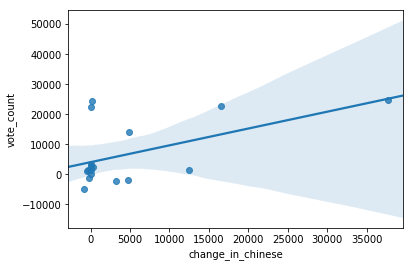

In [103]:
raceSummary('chinese')
createRaceDataFrame('chinese')

                            OLS Regression Results                            
Dep. Variable:        change_in_malay   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     9.136
Date:                Sun, 27 Jan 2019   Prob (F-statistic):            0.00809
Time:                        16:01:34   Log-Likelihood:                -151.11
No. Observations:                  17   AIC:                             304.2
Df Residuals:                      16   BIC:                             305.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.1096      0.036      3.023      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


,constituency_type,party,vote_count,vote_percentage,change_in_malay
constituency,,,,,
Aljunied,GRC,WP,-2239,-3.76,414.0
Ang Mo Kio,GRC,RP,22639,9.31,3324.0
Bishan-Toa Payoh,GRC,SPP,24316,16.66,302.0
Bukit Panjang,SMC,SDP,1579,2.11,165.0
East Coast,GRC,WP,-4899,5.9,302.0
Holland-Bukit Timah,GRC,SDP,14013,6.52,69.0
Hong Kah North,SMC,SPP,1472,4.15,NaN
Hougang,SMC,WP,-1823,-7.14,232.0
Nee Soon,GRC,WP,1547,8.43,3061.0


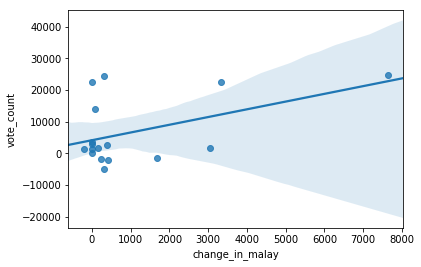

In [104]:
raceSummary('malay')
createRaceDataFrame('malay')

                            OLS Regression Results                            
Dep. Variable:       change_in_indian   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     6.942
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0180
Time:                        16:01:36   Log-Likelihood:                -138.48
No. Observations:                  17   AIC:                             279.0
Df Residuals:                      16   BIC:                             279.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.0454      0.017      2.635      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


,constituency_type,party,vote_count,vote_percentage,change_in_indian
constituency,,,,,
Aljunied,GRC,WP,-2239,-3.76,481.0
Ang Mo Kio,GRC,RP,22639,9.31,877.0
Bishan-Toa Payoh,GRC,SPP,24316,16.66,-80.0
Bukit Panjang,SMC,SDP,1579,2.11,51.0
East Coast,GRC,WP,-4899,5.9,-23.0
Holland-Bukit Timah,GRC,SDP,14013,6.52,9.0
Hong Kah North,SMC,SPP,1472,4.15,NaN
Hougang,SMC,WP,-1823,-7.14,562.0
Nee Soon,GRC,WP,1547,8.43,391.0


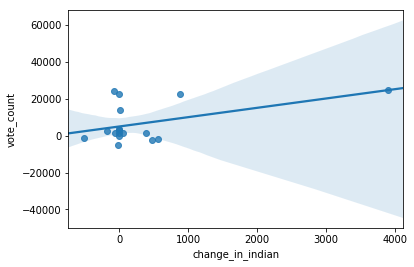

In [105]:
raceSummary('indian')
createRaceDataFrame('indian')

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:        change_in_other   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     8.202
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0113
Time:                        16:01:37   Log-Likelihood:                -117.06
No. Observations:                  17   AIC:                             236.1
Df Residuals:                      16   BIC:                             237.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.0140      0.005      2.864      0.0

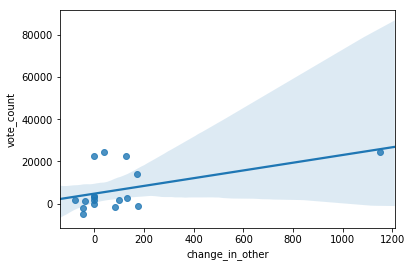

In [106]:
raceSummary('other')

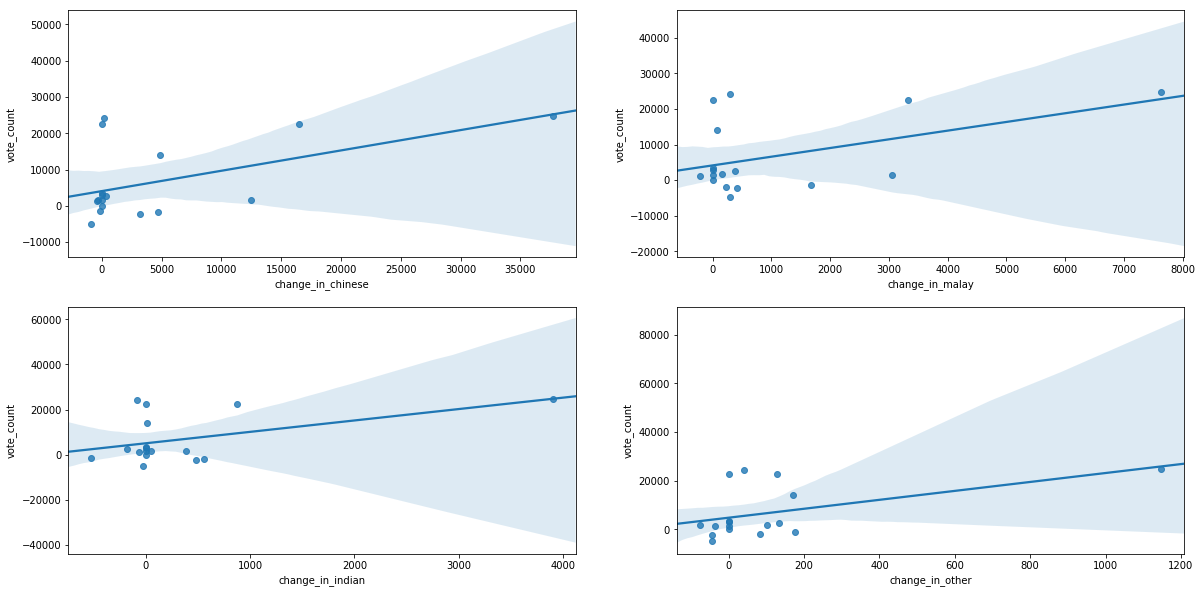

In [107]:
plt.subplots(figsize=(20,10))
a1 = plt.subplot(221)
a1 = plotRaceDataFrame('chinese')
a2 = plt.subplot(222)
a2 = plotRaceDataFrame('malay')
a3 = plt.subplot(223)
a3 = plotRaceDataFrame('indian')
a4 = plt.subplot(224)
a4 = plotRaceDataFrame('other')

In [108]:
allPercChange_df.reset_index().groupby('index').sum()


,perc_change_chinese,perc_change_malay,perc_change_indian,perc_change_other
index,,,,
Ang Mo Kio,-1.576290,3.051913,-2.086694,-1.382652
Bedok,-1.002945,0.284942,-0.405495,-1.270050
Bishan,-0.228379,-0.490185,-0.941753,-0.497512
Bukit Merah,-1.948093,35.757161,-2.736768,6.012706
Bukit Panjang,-0.664862,1.318498,1.213035,-5.317367
Bukit Timah,12.419605,14.249503,9.307551,6.260633
Changi,25.947155,65.900478,19.424928,40.096038
Clementi,3.985149,-2.630165,-4.622840,2.557043
Geylang,-0.018846,1.117856,-1.679027,3.503886


### Percentage Change in Demographics against Perc Change in votes

In [129]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import statsmodels.api as sm
allPercChangeSummed = allPercChange_df.reset_index().groupby('index').sum()
def getRaceDict(race):
    total_votes_grc = {}
    for k,v in scraped_data.items():
        for town in v:
            try:
                if k not in total_votes_grc:
                    total_votes_grc[k] = [allPercChangeSummed.loc[town]['perc_change_'+race.lower()]]
                else:
                    total_votes_grc[k][0] += allPercChangeSummed.loc[town]['perc_change_'+race.lower()]
            except:
                pass
    return total_votes_grc

def createRaceDataFrame(race):
    total_votes_grc = getRaceDict(race)
    race_demo = pd.DataFrame.from_dict(total_votes_grc).T
    race_demo = race_demo.reset_index().set_index('index')
    race_merged = df_elec_stats_2.join([race_demo])
    race_merged.columns = ['constituency_type', 'party','vote_count','vote_percentage','perc_change_in_'+race.lower()]
    race_merged.index.name='constituency'
    race_merged.vote_percentage = race_merged.vote_percentage *100
    return race_merged

def plotRaceDataFrame(race):
    merged = createRaceDataFrame(race)
    merged = merged.fillna(0)
    sns.regplot(y=merged['vote_percentage'],x=merged['perc_change_in_'+race.lower()])
    return merged
    
def raceSummary(race):
    merged = plotRaceDataFrame(race)
    results = sm.OLS(merged['perc_change_in_'+race.lower()],merged['vote_percentage']).fit()
    # plt.plot(chinese_merged['change_in_chinese'],results.fittedvalues, c='red')
    print(results.summary())




C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


                              OLS Regression Results                             
Dep. Variable:     perc_change_in_indian   R-squared:                       0.064
Model:                               OLS   Adj. R-squared:                  0.005
Method:                    Least Squares   F-statistic:                     1.091
Date:                   Sun, 27 Jan 2019   Prob (F-statistic):              0.312
Time:                           16:28:53   Log-Likelihood:                -90.804
No. Observations:                     17   AIC:                             183.6
Df Residuals:                         16   BIC:                             184.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
vote_percent

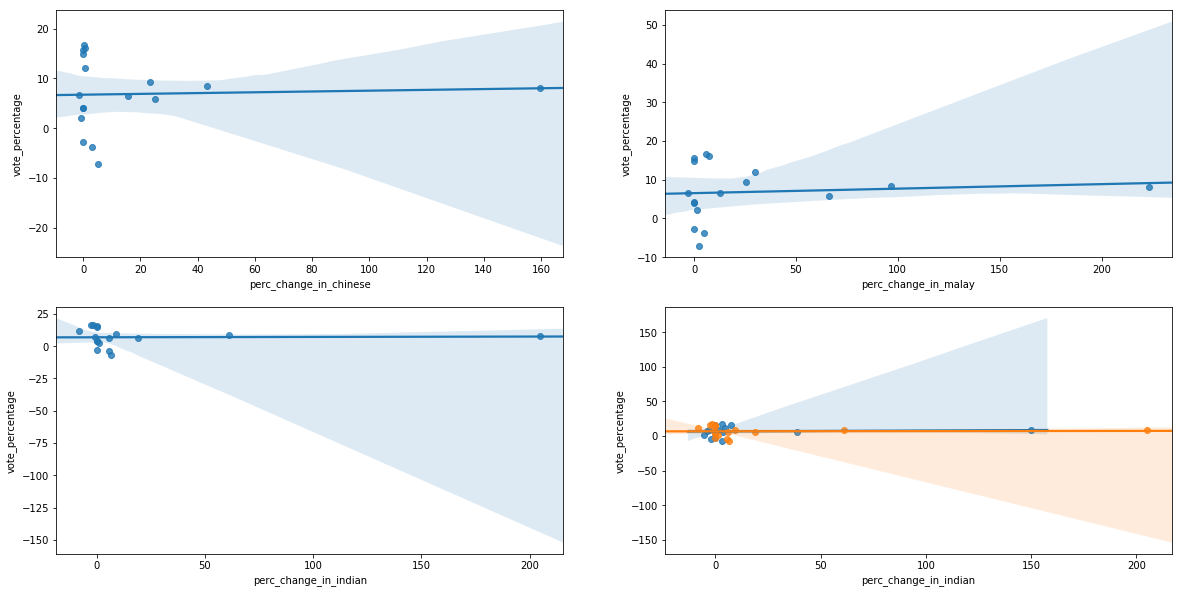

In [130]:
plt.subplots(figsize=(20,10))
a1 = plt.subplot(221)
a1 = plotRaceDataFrame('chinese')
a2 = plt.subplot(222)
a2 = plotRaceDataFrame('malay')
a3 = plt.subplot(223)
a3 = plotRaceDataFrame('indian')
a4 = plt.subplot(224)
a4 = plotRaceDataFrame('other')
raceSummary('indian')

                             OLS Regression Results                             
Dep. Variable:     perc_change_in_malay   R-squared:                       0.142
Model:                              OLS   Adj. R-squared:                  0.089
Method:                   Least Squares   F-statistic:                     2.659
Date:                  Sun, 27 Jan 2019   Prob (F-statistic):              0.123
Time:                          16:02:32   Log-Likelihood:                -92.995
No. Observations:                    17   AIC:                             188.0
Df Residuals:                        16   BIC:                             188.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
vote_percentage     2.

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


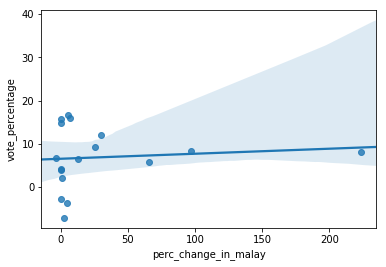

In [111]:
raceSummary('malay')

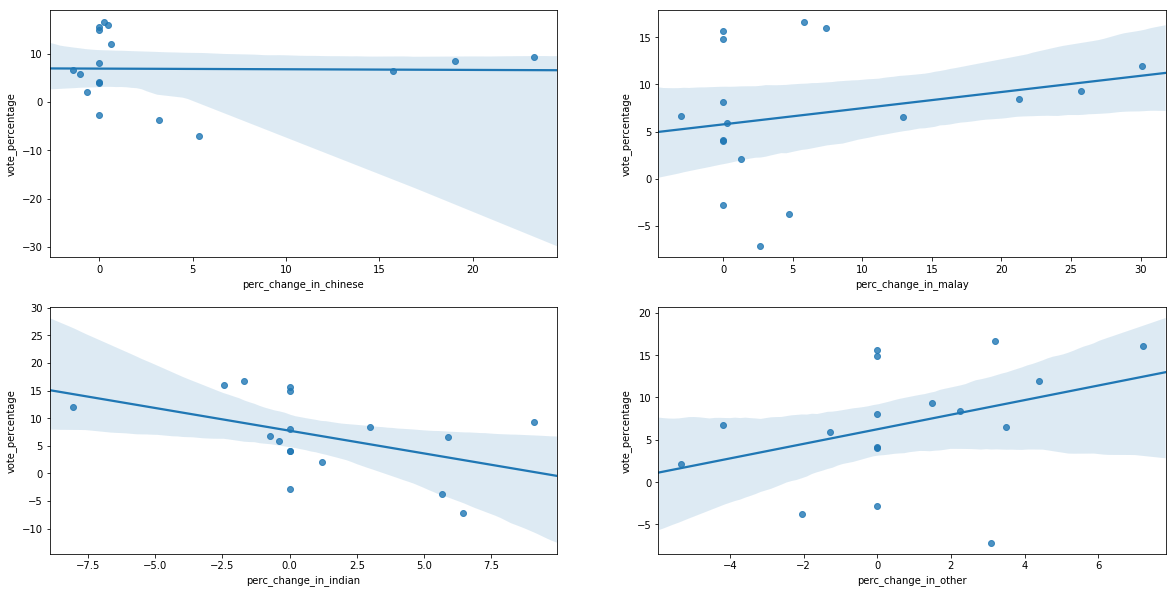

In [134]:
allPercChange_df_copy = allPercChange_df.drop(index=['Punggol','Singapore River','Mandai','Changi'])
allPercChangeSummed = allPercChange_df_copy.reset_index().groupby('index').sum()
def getRaceDict(race):
    total_votes_grc = {}
    for k,v in scraped_data.items():
        for town in v:
            try:
                if k not in total_votes_grc:
                    total_votes_grc[k] = [allPercChangeSummed.loc[town]['perc_change_'+race.lower()]]
                else:
                    total_votes_grc[k][0] += allPercChangeSummed.loc[town]['perc_change_'+race.lower()]
            except:
                pass
    return total_votes_grc

def createRaceDataFrame(race):
    total_votes_grc = getRaceDict(race)
    race_demo = pd.DataFrame.from_dict(total_votes_grc).T
    race_demo = race_demo.reset_index().set_index('index')
    race_merged = df_elec_stats_2.join([race_demo])
    race_merged.columns = ['constituency_type', 'party','vote_count','vote_percentage','perc_change_in_'+race.lower()]
    race_merged.index.name='constituency'
    race_merged.vote_percentage = race_merged.vote_percentage *100
    return race_merged

def plotRaceDataFrame(race):
    merged = createRaceDataFrame(race)
    merged = merged.fillna(0)
    sns.regplot(y=merged['vote_percentage'],x=merged['perc_change_in_'+race.lower()])
    return merged
    
def raceSummary(race):
    merged = plotRaceDataFrame(race)
    results = sm.OLS(merged['perc_change_in_'+race.lower()],merged['vote_percentage']).fit()
    # plt.plot(chinese_merged['change_in_chinese'],results.fittedvalues, c='red')
    print(results.summary())

plt.subplots(figsize=(20,10))
a1 = plt.subplot(221)
a1 = plotRaceDataFrame('chinese')
a2 = plt.subplot(222)
a2 = plotRaceDataFrame('malay')
a3 = plt.subplot(223)
a3 = plotRaceDataFrame('indian')
a4 = plt.subplot(224)
a4 = plotRaceDataFrame('other')



## OTHERS - all towns (*both common and noncommon towns*)

In [48]:
difference_df = df_grpby_2015-df_grpby_2010
difference_df

,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
main_town,,,,,,,,,,,,,,
Ang Mo Kio,-2893.0,-1634.0,-3676.0,-2360.0,-1316.0,187.0,75.0,122.0,-802.0,-482.0,-320.0,-236.0,-116.0,-110.0
Bedok,-3180.0,-1589.0,-1012.0,-1300.0,288.0,-3199.0,-1538.0,-1661.0,-238.0,-148.0,-90.0,-320.0,-194.0,-126.0
Bishan,-420.0,-178.0,-83.0,-139.0,56.0,-285.0,-141.0,-144.0,-223.0,-130.0,-93.0,-7.0,0.0,-7.0
Boon Lay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bukit Batok,-2712.0,-2226.0,-2186.0,-1191.0,-995.0,-912.0,-489.0,-423.0,-1527.0,-892.0,-645.0,-293.0,-140.0,-153.0
Bukit Merah,-1381.0,-23.0,-2813.0,-1975.0,-828.0,2035.0,1071.0,964.0,-777.0,-512.0,-265.0,151.0,45.0,96.0
Bukit Panjang,-12418.0,-12249.0,-19601.0,-9960.0,-9641.0,-3287.0,-1561.0,-1726.0,-1359.0,-654.0,-705.0,-430.0,-253.0,-177.0
Bukit Timah,1681.0,2475.0,3786.0,1479.0,2307.0,40.0,23.0,27.0,153.0,75.0,88.0,177.0,114.0,63.0
Central Water Catchment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
difference_clean = difference_df.dropna()

In [37]:
difference_clean.columns
difference_clean = difference_clean.drop(['Total Males',"Total Females","Total Chinese", "Total Malays","Total Indians","Total Others"], axis = 1)

In [49]:
difference_df_perc = (df_grpby_2015-df_grpby_2010)/df_grpby_2010*100
# difference_df_perc.head()
difference_df_perc.dropna(inplace=True)
difference_df_perc.drop(['Total Males',"Total Females","Total Chinese", "Total Malays","Total Indians","Total Others"], axis = 1,inplace=True)
